## Comparing regressors

Let's try different regressors and compare them to select the best one.

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_pickle("../data/training_df")

In [3]:
df.head()

,cr,feat_03_syn,feat_04_syn,feat_10_syn,feat_12_syn,feat_13_syn,feat_15_syn,feat_20_syn,feat_24_syn,feat_26_syn,...,feat_22_mm,feat_23_mm,feat_30_mm,feat_33_mm,feat_34_mm,feat_36_mm,feat_38_mm,feat_40_mm,feat_41_mm,feat_47_mm
0,0.818182,0,0,0,0,0,0,0,0,0,...,0.000000,0.009756,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.001747
1,0.755102,0,0,0,0,0,0,0,0,0,...,0.000000,0.014634,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.257576,0,0,0,0,0,0,0,0,0,...,0.044776,0.039024,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.026201
3,0.381818,0,0,0,0,0,0,0,0,0,...,0.014925,0.024390,0.0,0.009524,0.010417,0.0,0.0,0.0,0.007407,0.006114
4,0.870968,0,0,0,0,0,0,0,0,0,...,0.000000,0.019512,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.018341


## Train-Test

In [4]:
X = df.drop(['cr'], axis=1)
y = df['cr']  # Labels

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [26]:
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(721898, 33) Output label(721898,)
Dimensions of datasets that will be used for testing : Input features(309385, 33) Output label(309385,)


Check distribution of cr on the test set.

C:\Users\rocastillo\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cr', ylabel='Density'>

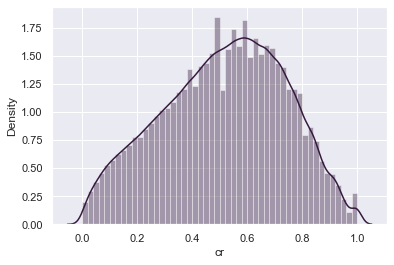

In [6]:
sns.set(style="darkgrid", palette="rocket")
sns.distplot(y_test)

## Evaluation tools and metrics

In [7]:
def fit(model, X_train, y_train):
    start = time()
    model.fit(X_train, y_train)
    end = time()
    result = end - start
    print('Training time = %.3f seconds' % result)
    #  The default score for RandomForestRegressor is R2
    score = model.score(X_train, y_train)
    print("R-squared:", score)
    return model

In [20]:
def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()
    

def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

In [9]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE: ", mse)
    
    score = model.score(X_test, y_test)
    print("R-squared:", score)

## Multiple linear regression model

Since multiple linear regression assumes that output depends on more than one variable, we are assuming that it depends on all the 33 features. 

In [28]:
from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()
mlr_model.fit(X_train,y_train)

y_pred_mlr= mlr_model.predict(X_test)

print(mlr_model)

LinearRegression()


In [30]:
print('Intercept: \n',mlr_model.intercept_)
print('Coefficients: \n', mlr_model.coef_)

Intercept: 
 0.5361669345895748
Coefficients: 
 [-2.99482224e-02 -1.13639722e-01 -4.44069360e-02 -1.16337656e-01
 -4.39693382e-02 -1.69563497e-01 -1.84438320e-01 -1.42356207e-02
 -4.84943640e-02  4.13433985e-02 -3.83898024e-02  4.81120994e-02
 -3.50688764e-02 -1.02197629e+00  5.00095886e+11 -1.38433240e-01
 -1.23352129e+00 -4.55175039e+00 -4.08831703e-01 -1.67998644e+00
 -2.75644325e+00 -7.22677313e-01  2.31173469e+00 -9.79111308e-01
 -5.91020341e-01  1.60595402e-01  1.49674882e+00 -5.00095886e+11
  3.04850867e-02 -1.06416739e+00  1.12322970e-01 -4.28567779e-01
 -4.36069172e-01]


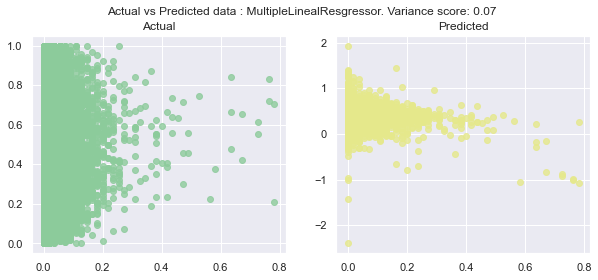

In [31]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_mlr, "MultipleLinealResgressor")

In [32]:
mlrMetrics = model_metrics(mlr_model,y_test,y_pred_mlr)

Mean squared error: 0.05
R2 score: 0.07


In [33]:
# Are we overfitting?
print("Training set score: {:.2f}".format(mlr_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlr_model.score(X_test, y_test)))

Training set score: 0.07
Test set score: 0.07


## Ridge Regression

This is the basic OLS model plus the L2 regularization (want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well).
The default parameter for Ridge model is alpha = 1.0. By changing the alpha value when instantiating the class, users can adjust the level of restrictions on the Ridge Regression.

In [34]:
from sklearn.linear_model import Ridge

rr_model = Ridge().fit(X_train, y_train)
y_pred_rr= rr_model.predict(X_test)

print(rr_model)

Ridge()


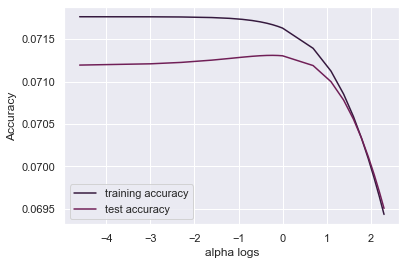

In [36]:
training_accuracy = []
test_accuracy = []

# try alpha from 0.01 to 10
alpha_settings = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

for alpha in alpha_settings:
    # build the model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(ridge.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(ridge.score(X_test, y_test))

plt.plot(np.log(np.array(alpha_settings)),
         training_accuracy, label="training accuracy")
plt.plot(np.log(np.array(alpha_settings)),
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha logs")
plt.legend()

The performance of the model on the test set hits the highest point when the natural logarithm of the alpha is 0.

In [38]:
rr_model = Ridge(alpha=0).fit(X_train, y_train)
y_pred_rr= rr_model.predict(X_test)

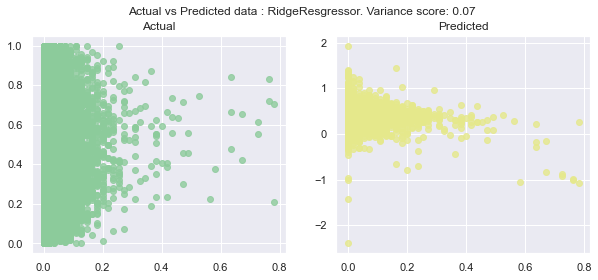

In [39]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_rr, "RidgeResgressor")

As bad as the previous one.

In [40]:
rrMetrics = model_metrics(rr_model,y_test,y_pred_rr)

Mean squared error: 0.05
R2 score: 0.07


## Decision Tree Regressor

### Gridsearch

In [43]:
param_grid = {
    'max_depth': [5, 6, None]
}

In [44]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42,max_features=33)
grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   12.6s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   17.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   17.7s finished


{'max_depth': 6}

In [46]:
dtr_model = DecisionTreeRegressor(random_state=42,max_depth= 6)
dtr_model.fit(X_train,y_train)

y_pred_dtr = dtr_model.predict(X_test)

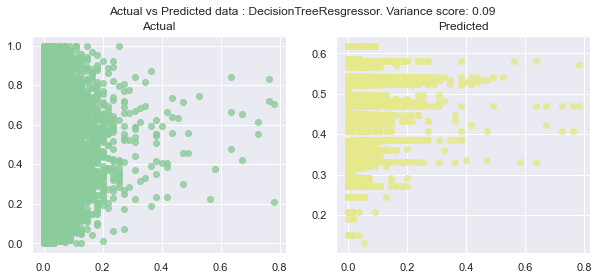

In [47]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_dtr, "DecisionTreeResgressor")

In [48]:
dtrMetrics = model_metrics(dtr_model,y_test,y_pred_dtr)

Mean squared error: 0.05
R2 score: 0.09


## RandomForestRegressor

### Gridsearch

In [10]:
 param_grid = {
    'max_depth': [5, 6],
    'n_estimators':  [50, 100, 1000, 1200]
}

In [11]:
# Create a based model
rf = RandomForestRegressor(random_state=42) # scoring default=”mse”
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 140.3min remaining: 12.8min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 140.3min finished


{'max_depth': 6, 'n_estimators': 100}

In [12]:
final_model = RandomForestRegressor(n_estimators= 100,
 max_depth= 6,
 n_jobs=-1)
bm = fit(final_model, X_train, y_train)

Training time = 76.409 seconds
R-squared: 0.09397386095758542


In [13]:
#display adjusted R-squared
score = final_model.score(X_train, y_train)
adj_r2 = 1 - (1-score*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
adj_r2

0.093978156970978

In [22]:
y_pred_rfr = bm.predict(X_test)

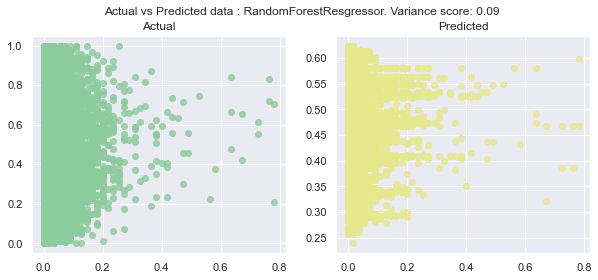

In [23]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_rfr, "RandomForestResgressor")

In [24]:
rfrMetrics = model_metrics(bm,y_test,y_pred_rfr)

Mean squared error: 0.05
R2 score: 0.09


The value of R squared is very low 0.094. We have many predictors in the dataset, that has an negative impact in measuring R squared. R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. 

# Comparison graph

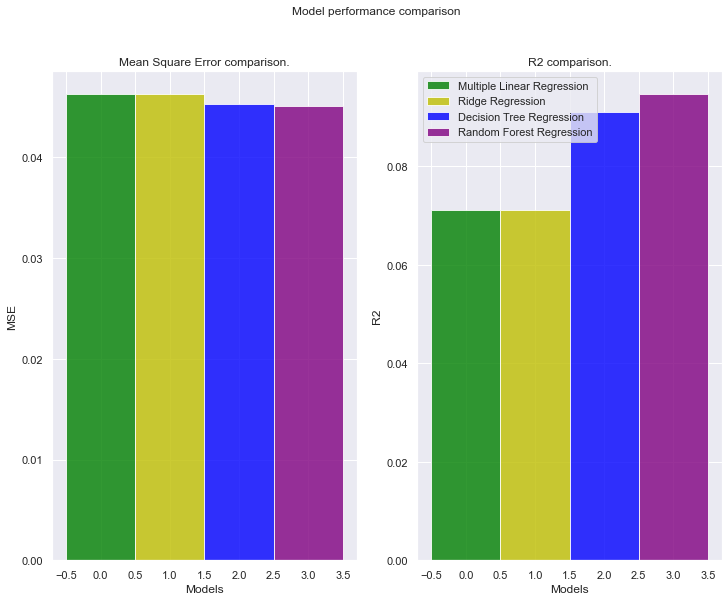

In [51]:
n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8


area = 60
# First subplot
ax = plt.subplots(ncols=2, figsize=(12,9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, mlrMetrics[0], bar_width,
alpha=opacity,
color='g',
label='Multiple Linear Regression')

rects2 = plt.bar(index + bar_width, rrMetrics[0], bar_width,
alpha=opacity,
color='y',
label='Ridge Regression')

rects3 = plt.bar(index + bar_width*2, dtrMetrics[0], bar_width,
alpha=opacity,
color='b',
label='Decision Tree Regression')

rects4 = plt.bar(index + bar_width*3, rfrMetrics[0], bar_width,
alpha=opacity,
color='purple',
label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Square Error comparison.')

plt.subplot(122)

rects1 = plt.bar(index, mlrMetrics[1], bar_width,
alpha=opacity,
color='g',
label='Multiple Linear Regression')

rects2 = plt.bar(index + bar_width, rrMetrics[1], bar_width,
alpha=opacity,
color='y',
label='Ridge Regression')

rects3 = plt.bar(index + bar_width*2, dtrMetrics[1], bar_width,
alpha=opacity,
color='b',
label='Decision Tree Regression')


rects4 = plt.bar(index + bar_width*3, rfrMetrics[1], bar_width,
alpha=opacity,
color='purple',
label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')

plt.legend()
plt.show()

## Save model

In [25]:
import joblib
# save
joblib.dump(bm, "../models/rfr_model.joblib")

['rfr_model.joblib']

# Conclusion
The best model that we found was the RandomForestRegressor, the mean squared error of 0.05 in the scale of a target value, between 0 and 1, means that we are making an average error of 5% in our predictions. This could be an acceptable error. However it would be also interesting to research other supervised models and to check if we could improve even further these results.